In [1]:
import pandas as pd
from pathlib import Path

data_folder = Path("/home/luba/Documents/DS/projects-courses-ongoing/sklearn-course-inria-[doing]/datasets")
figure_folders = Path("/home/luba/Documents/DS/projects-courses-ongoing/sklearn-course-inria-[doing]/figures")

adult_census = pd.read_csv(data_folder.joinpath("adult-census.csv"))
adult_census = adult_census.drop(columns="education-num")
adult_census.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [15]:
from sklearn import set_config

set_config(display="diagram")

In [4]:
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)

Then, we select only the numerical columns, as seen in the previous
notebook.

In [5]:
numerical_columns = [
    "age", "capital-gain", "capital-loss", "hours-per-week"]

data_numeric = data[numerical_columns]

Finally, we can divide our dataset into a train and test sets.

In [10]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42)

In [11]:
data_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.642352,1087.077721,89.665311,40.431247
std,13.725748,7522.692939,407.110175,12.423952
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

In [17]:
scaler.mean_, scaler.scale_

(array([  38.64235211, 1087.07772106,   89.6653108 ,   40.43124676]),
 array([  13.72556083, 7522.59025606,  407.10461772,   12.42378265]))

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">scikit-learn convention: if an attribute is learned from the data, its name
ends with an underscore (i.e. <tt class="docutils literal">_</tt>), as in <tt class="docutils literal">mean_</tt> and <tt class="docutils literal">scale_</tt> for the
<tt class="docutils literal">StandardScaler</tt>.</p>
</div>

Scaling the data is applied to each feature individually (i.e. each column in
the data matrix). For each feature, we subtract its mean and divide by its
standard deviation.

Once we have called the `fit` method, we can perform data transformation by
calling the method `transform`.

In [20]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled_df = pd.DataFrame(data_train_scaled, columns=data_train.columns)
data_train_scaled_df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04
mean,-2.273364e-16,3.530310e-17,3.840667e-17,1.844684e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.576792e+00,-1.445084e-01,-2.202513e-01,-3.173852e+00
25%,-7.753674e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
50%,-1.196565e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
75%,6.817680e-01,-1.445084e-01,-2.202513e-01,3.677425e-01
max,3.741752e+00,1.314865e+01,1.047970e+01,4.714245e+00


Let's illustrate the internal mechanism of the `transform` method and put it
to perspective with what we already saw with predictors.

![Transformer transform diagram](/home/luba/Documents/DS/projects-courses-ongoing/sklearn-course-inria-[doing]/figures/api_diagram-transformer.transform.svg)

The `transform` method for transformers is similar to the `predict` method
for predictors. It uses a predefined function, called a **transformation
function**, and uses the model states and the input data. However, instead of
outputting predictions, the job of the `transform` method is to output a
transformed version of the input data.

Finally, the method `fit_transform` is a shorthand method to call
successively `fit` and then `transform`.

![Transformer fit_transform diagram](/home/luba/Documents/DS/projects-courses-ongoing/sklearn-course-inria-[doing]/figures/api_diagram-transformer.fit_transform.svg)

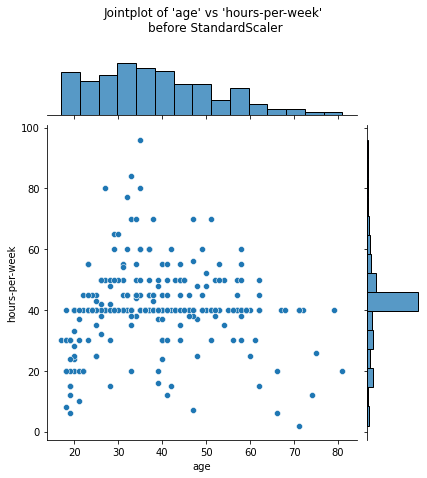

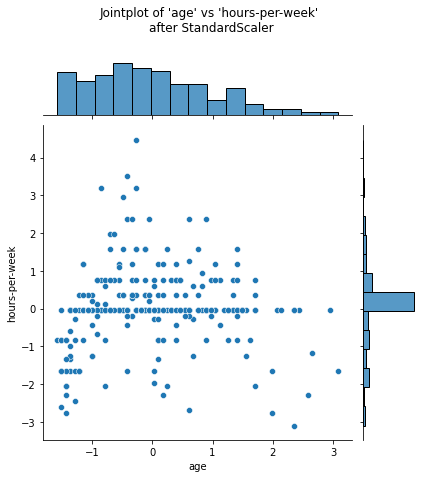

In [24]:
# visualize
import matplotlib.pyplot as plt
import seaborn as sns

num_points_to_plot = 300

sns.jointplot(
    data=data_train[:num_points_to_plot],
    x="age",
    y="hours-per-week",
    marginal_kws=dict(bins=15)
)
plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nbefore StandardScaler", y=1.1)

sns.jointplot(
    data=data_train_scaled_df[:num_points_to_plot],
    x="age",
    y="hours-per-week",
    marginal_kws=dict(bins=15)
)
_ = plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nafter StandardScaler", y=1.1)

In [25]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [26]:
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

This predictive pipeline exposes the same methods as the final predictor:
`fit` and `predict` (and additionally `predict_proba`, `decision_function`,
or `score`).

In [27]:
model.fit(data_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

We can represent the internal mechanism of a pipeline when calling `fit`
by the following diagram:

![pipeline fit diagram](/home/luba/Documents/DS/projects-courses-ongoing/sklearn-course-inria-[doing]/figures/api_diagram-pipeline.fit.svg)

When calling `model.fit`, the method `fit_transform` from each underlying
transformer (here a single transformer) in the pipeline will be called to:

- learn their internal model states
- transform the training data. Finally, the preprocessed data are provided to
  train the predictor.

To predict the targets given a test set, one uses the `predict` method.

In [28]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

Let's show the underlying mechanism:

![pipeline predict diagram](/home/luba/Documents/DS/projects-courses-ongoing/sklearn-course-inria-[doing]/figures/api_diagram-pipeline.predict.svg)

The method `transform` of each transformer (here a single transformer) is
called to preprocess the data. Note that there is no need to call the `fit`
method for these transformers because we are using the internal model states
computed when calling `model.fit`. The preprocessed data is then provided to
the predictor that will output the predicted target by calling its method
`predict`.

As a shorthand, we can check the score of the full predictive pipeline
calling the method `model.score`. Thus, let's check the computational and
generalization performance of such a predictive pipeline.

In [29]:
str(model)

"Pipeline(steps=[('standardscaler', StandardScaler()),\n                ('logisticregression', LogisticRegression())])"

In [30]:
model.__class__.__name__

'Pipeline'

In [31]:
score = model.score(data_test, target_test)
print(score)

0.8071411022848252


In [32]:
# model created on the previous notebook

# log-regression pipeline
model = make_pipeline(LogisticRegression())
model.fit(data_train, target_train)
model.score(data_test, target_test)

0.8070592089099992

We see that scaling the data before training the logistic regression was
beneficial in terms of computational performance. Indeed, the number of
iterations decreased as well as the training time. The generalization
performance did not change since both models converged.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">Working with non-scaled data will potentially force the algorithm to iterate
more as we showed in the example above. There is also the catastrophic
scenario where the number of required iterations is larger than the maximum
number of iterations allowed by the predictor (controlled by the <tt class="docutils literal">max_iter</tt>)
parameter. Therefore, before increasing <tt class="docutils literal">max_iter</tt>, make sure that the data
are well scaled.</p>
</div>